# Lets do this!

## 2016 Data

In [16]:
#!/usr/bin/env python

import glob
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
file_dir = 'datasets/ms_survey_feedback/2016/'

#Get all files except for wierdy week 8 one
filenames = glob.glob(file_dir + 'Anon Week * Feedback - *.csv')


#Get wierdy week 8 file
week_8 = glob.glob(file_dir + '*Week 8*')
w8_df = pd.read_csv(week_8[0])
display(w8_df.head())
#instantiate list to append columns to
col_number = list()
col_headers = list()

#Create list of column names to extract from filenames
df_2016 = pd.DataFrame([])
list_2016 = list()
print("number of files:", len(filenames))
week_set = set()
city_set = set()
for file_name in filenames:
    rows = list()
    file_data = file_name.split(" ")
    week = file_data[2]
    city_list = file_data[-1].split('.')
    city = city_list[0]
    file_df = pd.read_csv(file_name)
    
    week_set.add(week)
    city_set.add(city)
    
    week_data = list()
    city_data = list()

    for _ in range(0, len(file_df)):
        week_data.append(week)
        city_data.append(city)

    file_df["Week"] = week_data
    file_df["City"] = city_data
    list_2016.append(file_df)
    
df_2016 = pd.concat(list_2016)

display(df_2016.head())
#sample build data frames
# goose = pd.DataFrame([["one", "two"], ["two", "Three"]], columns=["one", "Two"])
# display(goose)

# duck = pd.DataFrame([["duck", "tuck"], ["muck", "luck"]], columns=["ruckus", "muckus"])
# display(duck)

# birds = [goose, duck]

# fritters = pd.concat(birds)
# display(fritters)



,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,location,track,Start Date (UTC),Submit Date (UTC),Network ID
0,00b836bda84e6bdbe780af97e249e59f,10,New York,summerApps,9/7/16 1:03,9/7/16 1:04,3212b7a834
1,39dde6dc0e1e375845d756fc7e39fc5f,10,San Francisco,summerIntro,9/7/16 1:03,9/7/16 1:04,f4954355aa
2,5e56b9de91670b308cb98dd2848b8739,10,New York,summerIntro,9/7/16 1:03,9/7/16 1:05,3d69ca289b
3,641081d05785b47a0f17448625da0d49,9,Sunnyvale,summerApps (4-week),9/7/16 1:04,9/7/16 1:06,261608f95d
4,c29bdd4f5678d78b450f4494e0f53c8c,3,San Francisco,summerIntro,9/7/16 1:04,9/7/16 1:11,d6672ddf6f


number of files: 39


,City,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Timestamp,Unnamed: 0,Week,What track are you in?
0,Taipei,NaN,3.0,3,8/5/2016 1:39:41,NaN,7,NaN
1,Taipei,NaN,3.0,4,8/5/2016 1:40:47,NaN,7,NaN
2,Taipei,NaN,3.0,4,8/5/2016 1:40:50,NaN,7,NaN
3,Taipei,NaN,4.0,4,8/5/2016 1:42:44,NaN,7,NaN
4,Taipei,NaN,4.0,5,8/5/2016 1:45:13,NaN,7,NaN


In [2]:
#Unique Values in data
week_list = df_2016.Week.unique()
city_list = df_2016.City.unique()
week_list.sort()
df_2016.describe()
print(week_list)
print(city_list)



['1' '2' '3' '4' '5' '6' '7']
['Taipei' 'Tokyo' 'Singapore' 'LA' 'SF' 'SV' 'SG' 'NY' 'HK']


Text(0.5,1,'Weekly average happiness based on city')

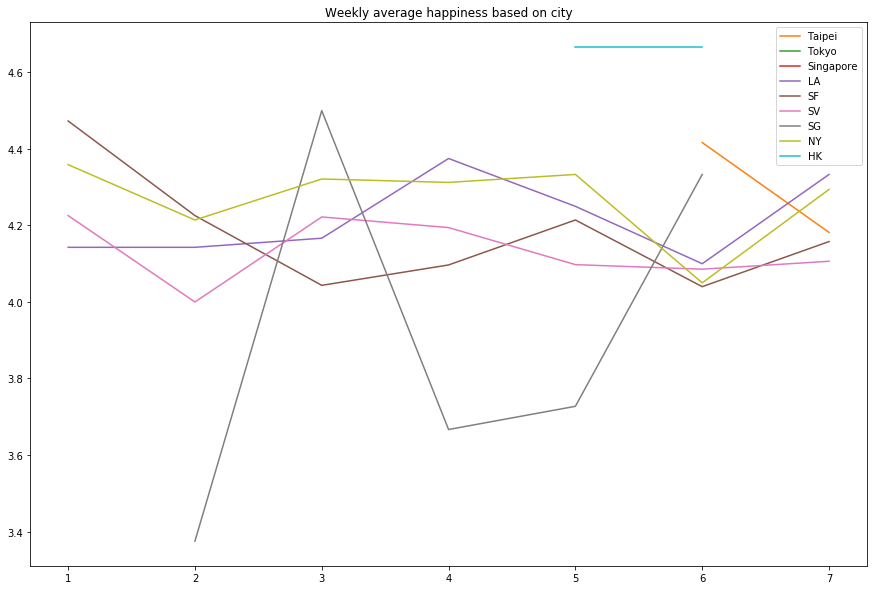

In [34]:
happy_key = "How would you rate your overall satisfaction with the Summer Academy this week?"

city_avgs_dict = dict() #Week is index value is dictionary with key:city and value is average score
#first 6 weeks of program
for city in df_2016.City.unique():

    #get weekly average scores per city
    avg_list = list()
    
    for week in range(1,8):   
        week_scores = df_2016.loc[(df_2016["Week"] == str(week)) & (df_2016["City"] == city), [happy_key] ]
        avg_list.append(week_scores[happy_key].mean())
    city_avgs_dict[city] = avg_list
    
weeks = [1, 2, 3, 4, 5, 6, 7]
color_index = 1
plt.figure(figsize=(15, 10))
legend = list()
for city in city_avgs_dict:
    legend.append(city)
    color = "C" + str(color_index)
    plt.plot(weeks, city_avgs_dict[city], color = color)
    color_index += 1
plt.legend(legend)
plt.title("Weekly average happiness based on city")

    



In [43]:

nps2017_df = pd.read_csv('datasets/ms_survey_feedback/2017/Student Feedback Surveys-Superview.csv')
display(nps2017_df.head())

#Find Unique values in data
week_list = nps2017_df.Week.unique()
city_list = nps2017_df.Location.unique()
rating = nps2017_df["Rating (Num)"].unique()
week_list.sort()
rating.sort()
df_2016.describe()

print(week_list)
print(city_list)
print(rating)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


['Week 1' 'Week 2' 'Week 3' 'Week 4' 'Week 5' 'Week 6' 'Week 7' 'Week 8']
['San Francisco' 'Los Angeles' nan 'New York City' 'Redwood City'
 'Santa Clara' 'Oakland' 'Washington DC' 'Chicago' 'Atlanta' 'Hong Kong'
 'Beijing' 'Tokyo']
['#ERROR!' '0' '1' '10' '2' '3' '4' '5' '6' '7' '8' '9']


In [44]:
#Find Errors
nps2017_df[nps2017_df["Rating (Num)"] == "#ERROR!"]


,ID,Location,Track,Week,Rating (Num),Schedule Pacing
1310,1356,NaN,NaN,Week 2,#ERROR!,NaN
1322,1368,NaN,NaN,Week 3,#ERROR!,NaN
1411,1458,NaN,NaN,Week 3,#ERROR!,NaN


In [61]:
#Remove Errors
nps2017_df = nps2017_df[nps2017_df["Rating (Num)"] != "#ERROR!"]
display(nps2017_df[nps2017_df["Rating (Num)"] == "#ERROR!"])
display(nps2017_df["Rating (Num)"].unique() )
#No more errors remain

,ID,Location,Track,Week,Rating (Num),Schedule Pacing


array(['3', '4', '5', '6', '7', '8', '9', '10', '0', '1', '2'], dtype=object)

Text(0.5,1,'Weekly average happiness based on city')

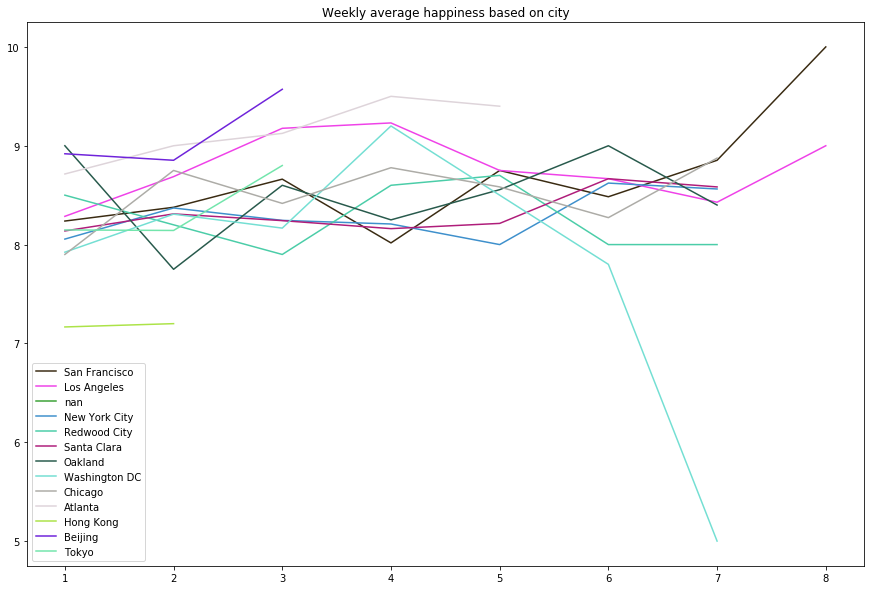

In [89]:
rating = "Rating (Num)"
city_avgs_dict = dict()
for city in nps2017_df.Location.unique():
    avg_list = list()
    for week in range(1,9): 
        week_value = "Week " + str(week)
        week_scores = nps2017_df.loc[(nps2017_df["Week"] == week_value) & (nps2017_df.Location == city), [rating]]
        avg_list.append(week_scores[rating].astype(int).mean())
    city_avgs_dict[city] = avg_list

weeks = [1, 2, 3, 4, 5, 6, 7, 8]
len(city_avgs_dict)
#13 cities need 13 colors :(
colors = ["#3A2B12", "#EF42E8", "#3AA135", "#3E90CC", "#4BCDA8", 
          "#AF1D7A", "#285A4C", "#74DFD3", "#ADACA7", "#DED4DA", 
          "#ACE348", "#6F23DA", "#73E5AC"]
color_index = 0
plt.figure(figsize=(15, 10))
legend = list()
for city in city_avgs_dict:
    legend.append(city)
    color = colors[color_index]
    plt.plot(weeks, city_avgs_dict[city], color = color)
    color_index += 1
plt.legend(legend)
plt.title("Weekly average happiness based on city")